# 11MAI -- Fourier series demo from Lecture 2
# Problem 2.3

Our task is to find Fourier series representation of half-wawe rectified sinusoid,
$$
  f(t) = \begin{cases} \sin\left(\dfrac{2\pi t}{T}\right) & \text{if} \quad 0 \le t < \dfrac{T}{2} \\ 0 & \text{if} \quad \dfrac{T}{2} \le t < T \end{cases}
$$
i.e. we have to find coefficients $a_0, a_1, a_2, \dots$ and $b_1, b_2, \dots$ of the formula
$$
  f(t) = a_0 + \sum_{k=1}^{\infty} a_k \cos k\omega_0 t + \sum_{k=1}^{\infty} b_k \sin k\omega_0 t
$$
as functions of $k$,and plot the first 5 components of the series
$$
  f(t) = \sum_{j=0}^{\infty} \alpha_j \phi_j(t),
$$
that is the functions
\begin{align*}
  f_0(t) &= \alpha_0 \phi_0(t), \\
  f_1(t) &= \alpha_1 \phi_1(t), \\
  f_2(t) &= \alpha_2 \phi_2(t), \\
  f_3(t) &= \alpha_3 \phi_3(t), \\
  f_4(t) &= \alpha_4 \phi_4(t). \\
\end{align*}

Contrary to the lecture, I will demonstrate here the use of Python, Jupyter notebooks, SymPy and NumPy + Matplotlib. In order to do so, we need to prepare our working environment:

In [1]:
from __future__ import division
from sympy import *
import numpy as np
from matplotlib import pyplot as plt

# These are arbitrary SymPy sybmols, i.e. real numbers, for example.
x, y, z, t, c = symbols('x y z t c')

# These are positive integers. Sympy may use the fact in cases where
# it would otherwise overcomplicate integration results due to the fact that
# some integer values may be negative or zero.
k, m, n = symbols('k m n', integer=True, positive=True)

# This switches on pretty-printing
init_printing()

The Fourier series is defined w.r.t. fundamental frequency
$$
  \omega_0 = \frac{2\pi}{T}
$$
so let us defined the corresponding symbols for future use in SymPy:

In [2]:
T, w0 = symbols('T \omega_0', positive=True)
w0 = 2*pi/T

In fact, the sinusoid we work with is
$$
 \sin\left(\dfrac{2\pi t}{T}\right) = \sin(\omega_0 t).
$$

## Scaling constants

### Constant $a_0$

The constant coefficient $a_0$ is defined as
\begin{align*}
  a_0 &= \frac{1}{T} \int_{0}^{T} f(t) \,\text{d}t = \frac{1}{T} \int_{0}^{T/2} \sin(\omega_0 t) \,\text{d}t =\\
      &= \frac{1}{T} \left[ -\frac{1}{\omega_0} \cos \omega_0 t \right]_0^{T/2} = 
         \frac{1}{T} \frac{1}{\omega_0} \left( - \cos \omega_0\frac{T}{2} + 1 \right) =
         \frac{1}{T} \frac{T}{2\pi} \left( - \cos \frac{2\pi}{T}\frac{T}{2} + 1 \right) =
         \frac{1}{2\pi} \left( -\cos \pi + 1 \right) = \frac{1}{2\pi} \left( 1 + 1 \right) \\
      &= \frac{1}{\pi}
\end{align*}

Using SymPy we easily verify

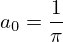

In [3]:
# If we want to output the variable name as well, we have to introduce formal
# equality between the displayed symbol and the result of integration:
sa0 = simplify(1/T*integrate(sin(w0*t),(t,0,T/2)))
Eq(S('a_0'), sa0)

### Coefficients $a_1, a_2, \dots$

For $k\ge1$ the situation becomes more complicated. We have
$$
  a_k = \frac{2}{T} \int_0^{T} f(t) \cdot \cos(k \omega_0 t) \, \text{d}t
      = \frac{2}{T} \int_0^{T/2} \sin(\omega_0 t) \cdot (\cos k \omega_0 t) \, \text{d}t
$$
which can be solved e.g. using the identity
$$
  2 \cos \theta \sin \varphi = \sin (\theta+\varphi) - \sin (\theta-\varphi)
$$
for $\theta=k\omega_0$ and $\varphi=\omega_0$.

This substitution results in an integral that is not difficult to compute, it's only time cosuming to write down:
\begin{align*}
  a_k &= \frac{1}{T} \int_{0}^{T/2} 2 \sin(\omega_0 t) \cdot \cos (k \omega_0 t) \,\text{d}t \\
      &= \frac{1}{T} \int_{0}^{T/2} \sin\left((k+1)\omega_0 t\right) \,\text{d}t - 
         \frac{1}{T} \int_{0}^{T/2} \sin\left((k-1)\omega_0 t\right) \,\text{d}t \\
  \frac{1}{T} \int_{0}^{T/2} \sin\bigl((k+1)\omega_0 t\bigr) \,\text{d}t
      &= \frac{1}{T} \left[ -\frac{1}{(k+1)\omega_0} \cos\bigl((k+1)\omega_0 t\bigr) \right]_0^{T/2} \\
      &= \frac{1}{T} \frac{1}{(k+1)\omega_0} \left( - \cos (k+1)\omega_0\frac{T}{2} + 1 \right) =
         \frac{1}{T} \frac{T}{2(k+1)\pi} \left( - \cos \frac{2(k+1)\pi}{T}\frac{T}{2} + 1 \right) \\
      &= \frac{-\cos (k+1)\pi + 1}{2(k+1)\pi} = \frac{(-1)^{k} + 1}{2(k+1)\pi} \\
  \frac{1}{T} \int_{0}^{T/2} \sin\bigl((k-1)\omega_0 t\bigr) \,\text{d}t
      &= \frac{1}{T} \left[ -\frac{1}{(k-1)\omega_0} \cos\bigl((k-1)\omega_0 t\bigr) \right]_0^{T/2} \\
      &= \frac{1}{T} \frac{1}{(k-1)\omega_0} \left( - \cos (k-1)\omega_0\frac{T}{2} + 1 \right) =
         \frac{1}{T} \frac{T}{2(k-1)\pi} \left( - \cos \frac{2(k-1)\pi}{T}\frac{T}{2} + 1 \right) \\
      &= \frac{-\cos (k-1)\pi + 1}{2(k-1)\pi} = \frac{(-1)^{k} + 1}{2(k-1)\pi}
\end{align*}
Note that the second integral vanishes for $k=1$ because $\sin(0\omega_0t) = 0$, so at the end we have
$$
  a_1 = \frac{(-1)^{1} + 1}{2(1+1)\pi} - 0 = \frac{0}{4\pi} = 0
$$
and for $k\ge2$
$$
  a_k = \frac{(-1)^{k} + 1}{2(k+1)\pi} - \frac{(-1)^{k} + 1}{2(k-1)\pi} = 
        \frac{\left((-1)^{k} + 1\right)(k - 1 - k - 1)}{2\pi(k^2-1)} = 
        -\frac{(-1)^{k} + 1}{\pi(k^2-1)} = \frac{(-1)^{k+1} - 1}{\pi(k^2-1)} 
$$
Hence,
$$
    a_k = \begin{cases} 0 & k=1, \\ \dfrac{(-1)^{k+1} - 1}{\pi(k^2-1)} & k\ge2. \end{cases}
$$

Let's verify with SymPy:

Start with the first integral

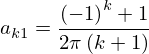

In [4]:
# If we want to output the variable name as well, we have to introduce formal
# equality between the displayed symbol and the result of integration:
sak_p1 = simplify(1/T*integrate(sin((k+1)*w0*t), (t,0,T/2)))
Eq(S('a_k1'), sak_p1)

and continue with the second one

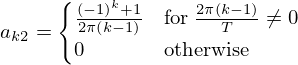

In [5]:
# If we want to output the variable name as well, we have to introduce formal
# equality between the displayed symbol and the result of integration:
sak_p2 = simplify(1/T*integrate(sin((k-1)*w0*t), (t,0,T/2)))
Eq(S('a_k2'), sak_p2)

(my version of SymPy has a slight problem with the condition for the first term, instead of $k\ne1$ the conditioning system is probably confused with both $T$ and $k$ being symbols and produces $\dfrac{2\pi(k-1)}{T}\ne0$ instead...)

Putting it together we get

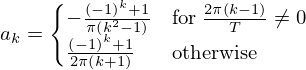

In [6]:
# If we want to output the variable name as well, we have to introduce formal
# equality between the displayed symbol and the result of integration:
sak = simplify(sak_p1 - sak_p2)
Eq(S('a_k'), sak)

And just to be sure, let's compute the complete integral for $a_k$ as well:

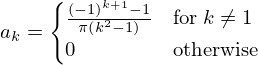

In [7]:
# If we want to output the variable name as well, we have to introduce formal
# equality between the displayed symbol and the result of integration:
sak = simplify(2/T*integrate(sin(w0*t)*cos(k*w0*t),(t,0,T/2)))
Eq(S('a_k'), sak)

### Coefficients $b_1, b_2, \dots$

Finally we need to compute also the scaling coefficients $b_k$:
$$
  b_k = \frac{2}{T} \int_0^{T} f(t) \cdot \sin(k \omega_0 t) \, \text{d}t
      = \frac{2}{T} \int_0^{T/2} \sin(\omega_0 t) \cdot \sin(k \omega_0 t) \, \text{d}t.
$$
This can be again solved e.g. using identity
$$
  2 \sin \theta \sin \varphi = \cos (\theta-\varphi) - \cos (\theta-\varphi)
$$
for $\theta=k\omega_0$ and $\varphi=\omega_0$.

This substitution again results in an integral that is not difficult to compute, it's only complicated to do so.
\begin{align*}
  b_k &= \frac{1}{T} \int_{0}^{T/2} 2 \sin\left(\omega_0 t\right) \cdot \sin\left(k \omega_0 t\right) \,\text{d}t \\
      &= \frac{1}{T} \int_{0}^{T/2} \cos\left((k-1)\omega_0 t\right) \,\text{d}t - 
         \frac{1}{T} \int_{0}^{T/2} \cos\left((k+1)\omega_0 t\right) \,\text{d}t \\
\end{align*}
The first integral degenerates to unity for $k=1$ and therefore
\begin{align*}
  \frac{1}{T} \int_{0}^{T/2} \cos(0\omega_0 t) \,\text{d}t
      &= \frac{1}{T} \int_{0}^{T/2} \,\text{d}t = 
         \frac{1}{T} \Bigl[ t \Bigr]_0^{T/2} = \frac{1}{T} \frac{T}{2} \\
      &= \frac{1}{2} 
\end{align*}
For $k>1$ we have
\begin{align*}
  \frac{2}{T} \int_{0}^{T/2} \cos\bigl((k-1)\omega_0 t\bigr) \,\text{d}t
      &= \frac{2}{T} \left[ \frac{1}{(k-1)\omega_0} \sin \bigl((k-1)\omega_0 t\bigr) \right]_0^{T/2} \\
      &= \frac{2}{T} \frac{1}{(k-1)\omega_0} \left( \sin (k-1)\omega_0\frac{T}{2} - 0 \right) =
         \frac{2}{T} \frac{T}{2(k-1)\pi} \sin \frac{2(k-1)\pi}{T}\frac{T}{2} \\
      &= \frac{\sin (k-1)\pi}{(k-1)\pi} = 0 \\
  \frac{2}{T} \int_{0}^{T/2} \cos\bigl((k+1)\omega_0 t\bigr) \,\text{d}t
      &= \frac{2}{T} \left[ \frac{1}{(k+1)\omega_0} \sin \bigl((k+1)\omega_0 t\bigr) \right]_0^{T/2} \\
      &= \frac{2}{T} \frac{1}{(k+1)\omega_0} \sin (k+1)\omega_0\frac{T}{2} =
         \frac{2}{T} \frac{T}{2(k+1)\pi} \sin \frac{2(k+1)\pi}{T}\frac{T}{2} \\
      &= \frac{\sin (k+1)\pi}{(k+1)\pi} = 0
\end{align*}
Hence,
$$
    b_k = \begin{cases} \dfrac{1}{2} & k=1, \\ 0 & k>1. \end{cases}
$$

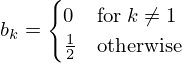

In [8]:
# If we want to output the variable name as well, we have to introduce formal
# equality between the displayed symbol and the result of integration:
bk = simplify(2/T*integrate(sin(w0*t)*sin(k*w0*t),(t,0,T/2)))
Eq(S('b_k'), bk)

## Plots

Let's first have a look at first five components of the Fourier series, i.e. at the first five scaled basis functions $\phi_0, \phi_1, \phi_2, \phi_3$, and $\phi_4$.

Looking back at the lecture notes we find
\begin{align*}
    \alpha_0 &= \sqrt{T} a_0 = \frac{1}{\pi}\,\sqrt{T} \\ 
    \alpha_1 &= \sqrt{\frac{T}{2}} a_1 = \frac{1}{2} \sqrt{\frac{T}{2}} \\ 
    \alpha_2 &= \sqrt{\frac{T}{2}} b_1 = 0 \\ 
    \alpha_3 &= \sqrt{\frac{T}{2}} a_2 = 0 \\ 
    \alpha_4 &= \sqrt{\frac{T}{2}} b_2 = -\frac{2}{3\pi} \sqrt{\frac{T}{2}}   
\end{align*}

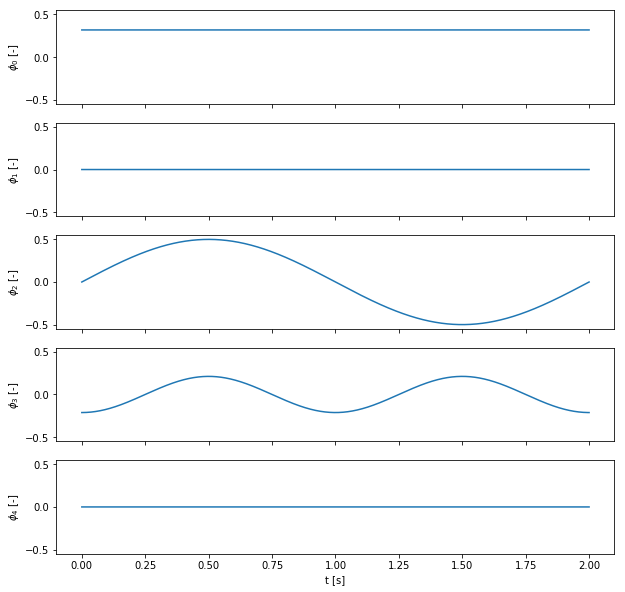

In [9]:
#
num_k = 5  # Number of components to display
num_s = 2000  # Number of points to sample in one period
num_T = 1  # Number of periods to display
T = 2.0  # Period length
t0 = 0.0  # First time sample. The last one will be at t0 + num_T*T
t1 = t0 + num_T*T  # last time sample
#
w0 = 2*np.pi/T  # Fundamental frequency
num_p = num_T * num_s  # Total number of points to sample
#
t = np.linspace(t0,t1,num_p)  # Uniform sampling of [t0, t1] using num_T*num_p points
#
fk = np.zeros((num_k, num_p))  # Matrix storing num_k rows of num_p samples, 
                               # i.e. storing the first num_k Fourier series components
# 
fig = plt.figure(figsize=(10, 10))  # Initialise the figure for drawing
ax0 = None  # Default axis that will be shared by all subfigures
#
a0 = 1/np.pi
#
alpha = np.empty(num_k)
#
for k in range(num_k):
    #
    # These are python shorthends, the meaning is the same as the code below
    # ak[k] = 0.0 if k==1 else ((-1)**(k+1)-1)/(np.pi*(k*k-1)) 
    # bk[k] = 0.5 if k==1 else 0.0
    #
    if k == 0:
        # Only a0 here.
        # The following two lines can be merged and simplified, but for
        # demonstration purposes I will let them stand as they are now.
        alpha_k = np.sqrt(T)/np.pi
        fk[0,:] = alpha_k * 1.0/np.sqrt(T) * np.ones((1,num_p))
    elif k % 2 == 1:
        # Index `k` is odd, k=2m-1, m=(k+1)/2
        m = (k+1)/2
        aa = 0.0 if m==1 else ((-1)**(m+1)-1)/(np.pi*(m*m-1)) 
        alpha_k = np.sqrt(T/2)*aa
        fk[k,:] = alpha_k * np.sqrt(T/2) * np.cos(m*w0*t)
    else:
        # Index `k` is even, k=2m, m=k/2
        m = k/2
        bb = 0.5 if m==1 else 0.0
        alpha_k = np.sqrt(T/2)*bb
        fk[k,:] = alpha_k * np.sqrt(T/2) * np.sin(m*w0*t)
    #
    plot_id = k+1
    axk = plt.subplot(num_k,1,plot_id, sharex=ax0)
    plt.plot(t, fk[k,:])
    plt.ylim(-0.55,0.55)
    plt.ylabel(f'$\phi_{{{k}}}$ [-]')
    if num_k == plot_id:
        plt.setp(axk.get_xticklabels(), visible=True)
    else:
        plt.setp(axk.get_xticklabels(), visible=False)
    if k==0:
        ax0 = axk
plt.xlabel('t [s]')
plt.show()

Let us compare it with the scaled harmonic components for $k=0,1,2,3,4$ from the separated formula, i.e. with the components
\begin{align*}
  f_0(t) &= a_0, \\
  f_1(t) &= a_1 \cos(\omega_0 t) + b_1 \sin(\omega_0 t), \\
  f_2(t) &= a_2 \cos(2\omega_0 t) + b_2 \sin(2\omega_0 t), \\
  f_3(t) &= a_3 \cos(3\omega_0 t) + b_3 \sin(3\omega_0 t), \\
  f_4(t) &= a_4 \cos(4\omega_0 t) + b_4 \sin(4\omega_0 t). \\
\end{align*}

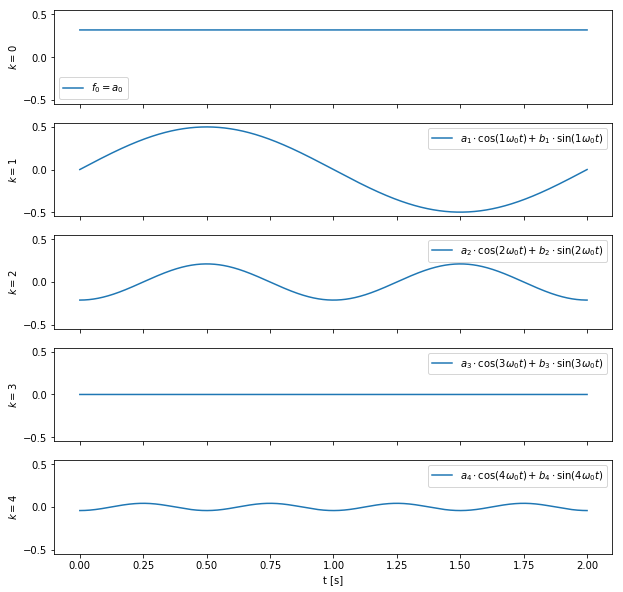

In [10]:
#
num_k = 5  # Number of components to display
num_r = 55  # Number of components to sum up for the final approximation
num_s = 2000  # Number of points to sample in one period
num_T = 1  # Number of periods to display
T = 2.0  # Period length
t0 = 0.0  # First time sample. The last one will be at t0 + num_T*T
t1 = t0 + num_T*T  # last time sample
#
w0 = 2*np.pi/T  # Fundamental frequency
num_p = num_T * num_s  # Total number of points to sample
#
t = np.linspace(t0,t1,num_p)  # Uniform sampling of [t0, t1] using num_T*num_p points
#
fs = np.zeros(num_p)
fs05 = None
fs15 = None
fs25 = None
#
fig = plt.figure(figsize=(10, 10))
ax0 = None
a0 = 1/np.pi
for k in range(num_r):
    ak = 0.0 if k==1 else ((-1)**(k+1)-1)/(np.pi*(k*k-1)) 
    bk = 0.5 if k==1 else 0.0
    sin_k = np.cos(k*w0*t)
    cos_k = np.sin(k*w0*t)
    fsk = a0*np.ones(num_p) if k==0 else ak*sin_k + bk*cos_k
    #
    if k == 5:
        fs05 = fs.copy()
    elif k == 15:
        fs15 = fs.copy()
    elif k == 25:
        fs25 = fs.copy()
    # Update the sum to include (k+1) components (remember, in Python
    # we have indexing from 0 and not from 1...)
    fs += fsk
    #
    if k < num_k:
        plot_id = k+1
        axk = plt.subplot(num_k,1,plot_id, sharex=ax0)
        plt.plot(t, fsk)
        plt.ylim(-0.55,0.55)
        plt.ylabel(f'$k = {k}$')
        if num_k == plot_id:
            plt.setp(axk.get_xticklabels(), visible=True)
        else:
            plt.setp(axk.get_xticklabels(), visible=False)
        if k==0:
            ax0 = axk
            plt.legend(['$f_0 = a_0$'])
        else:
            plt.legend([f'$a_{{{k}}}\cdot\cos({k}\omega_0 t)+b_{{{k}}}\cdot\sin({k}\omega_0 t)$'])
plt.xlabel('t [s]')
plt.show()

In [11]:
# Default figure size for all figures that follow this point
plt.rcParams['figure.figsize'] = [10, 5]

Create a vector holding function values of the original $f(t)$:

In [12]:
f = np.sin(w0*t)
# Replace all negative values of `f` with zero.
# The `f<0.0` results in a boolean vector containing only `True` and `False` values.
# This vector can be used as an index, selecting only those elements for that
# the index is set to `True`.
f[f<0.0] = 0.0

Now we have everything that is needed to plot some graphs that compare the original function with its approximation by partial sums of Fourier series.

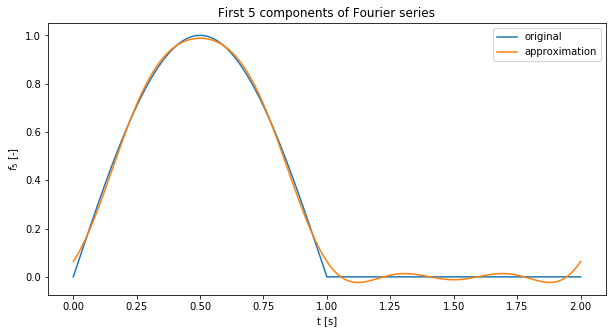

In [13]:
# plt.figure() will be called automatically
plt.plot(t,f,t,fs05)
plt.title('First 5 components of Fourier series')
plt.legend(['original','approximation'])
plt.xlabel('t [s]')
plt.ylabel('$f_{5}$ [-]')
plt.show()

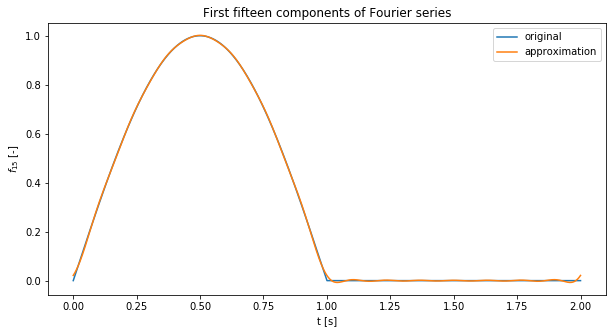

In [14]:
plt.plot(t,f,t,fs15)
plt.title('First fifteen components of Fourier series')
plt.legend(['original','approximation'])
plt.xlabel('t [s]')
plt.ylabel('$f_{15}$ [-]')
plt.show()

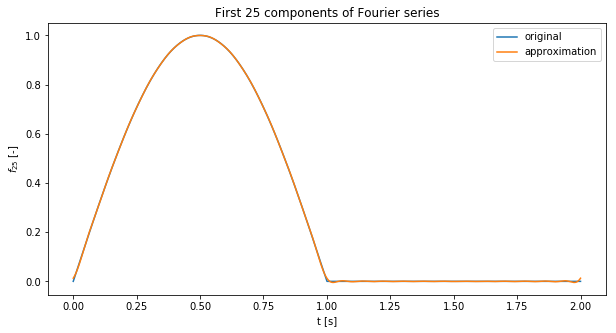

In [15]:
plt.plot(t,f,t,fs25)
plt.title('First 25 components of Fourier series')
plt.legend(['original','approximation'])
plt.xlabel('t [s]')
plt.ylabel('$f_{25}$ [-]')
plt.show()

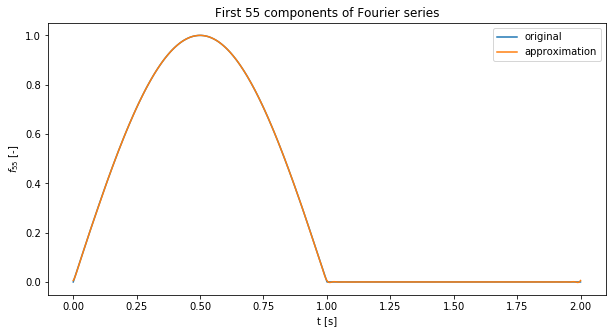

In [16]:
plt.plot(t,f,t,fs)
plt.title(f'First {num_r} components of Fourier series')
plt.legend(['original','approximation'])
plt.xlabel('t [s]')
plt.ylabel(f'$f_{{{num_r}}}$ [-]')
plt.show()

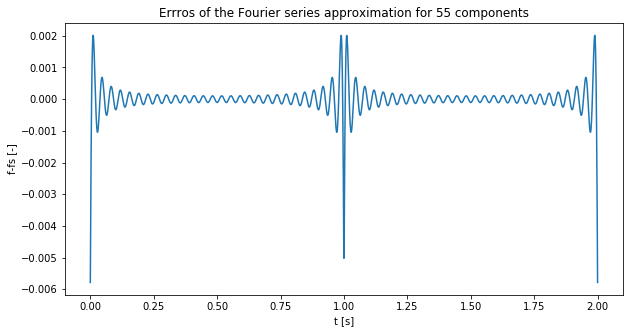

In [17]:
plt.plot(t,f-fs)
plt.title(f'Errros of the Fourier series approximation for {num_r} components')
plt.xlabel('t [s]')
plt.ylabel('f-fs [-]')
plt.show()

# Problem 2.4

Find the Fourier series representation for the sawtooth
$$
        f(t) = f(t+T) = t
$$
for $-T/2  \leq t \leq T/2$.

As the function $f(t)$ is odd, the coefficients $a_{k} = 0 $. We need to calculate only coefficients $b_{k}$.
Finally, we shall plot the first 5 components of the Fourier series.

We have
$$
  b_k = \frac{2}{T} \int_{-T/2}^{T/2} f(t) \cdot \sin(k \omega_0 t) \, \text{d}t
      = \frac{2}{T} \int_{-T/2}^{T/2} t \cdot \sin(k \omega_0 t) \, \text{d}t.
$$
The integral cen be solved by per partes integration, i.e. using the formula
$$
  \int uv^\prime = uv - \int u^\prime v
$$
and in our case
\begin{align*}
  u = t \quad & \quad v^\prime = \sin(k \omega_0 t), \\
  u^\prime = 1 \quad & \quad v = -\frac{1}{k \omega_0}\cos(k \omega_0 t).
\end{align*}
Therefore
\begin{align*}
  b_k &= \frac{2}{T} \int_{-T/2}^{T/2} t \cdot \sin(k \omega_0 t) \, \text{d}t = \\
      &= -\frac{2}{Tk \omega_0} \Bigl[ t \cos(k \omega_0 t)\Bigr]_{-T/2}^{T/2}
         -\frac{2}{Tk\omega_0} \int_{-T/2}^{T/2} \cos(k \omega_0 t) \, \text{d}t = \\
      &= -\frac{2}{Tk \omega_0} \Bigl[ t \cos(k \omega_0 t)\Bigr]_{-T/2}^{T/2}
         -\frac{2}{Tk^2\omega_0^2} \Bigl[ \sin(k \omega_0 t)\Bigr]_{-T/2}^{T/2} = \\
      &= -\frac{2}{Tk \omega_0} \Bigl[
            \frac{T}{2}\cos\left( k\frac{2\pi}{T}\frac{T}{2}\right)
           +\frac{T}{2}\cos\left(-k\frac{2\pi}{T}\frac{T}{2}\right) 
           \Bigr]
         -\frac{2}{Tk^2\omega_0^2} \Bigl[
            \sin\left( k\frac{2\pi}{T}\frac{T}{2}\right) 
           -\sin\left(-k\frac{2\pi}{T}\frac{T}{2}\right)
           \Bigr] = \\
      &= -\frac{1}{k \omega_0} \Bigl[
            \cos\left( k\pi\right)
           +\cos\left(-k\pi\right)
           \Bigr]
         -\frac{2}{Tk^2\omega_0^2} \Bigl[
           \sin\left( k\pi\right) 
           -\sin\left(k\pi\right)
           \Bigr] = \\           
      &=  -\frac{2\cos\left(k\pi\right)}{k\omega_0} - 0 = \\
      &=  -\frac{2(-1)^k}{k\omega_0} = -\frac{2(-1)^k}{k}\frac{T}{2\pi} = -\frac{T(-1)^k}{k\pi}  
\end{align*}
In fact, the integral
$$
\int_{-T/2}^{T/2} \cos(k \omega_0 t) \, \text{d}t
$$
is an integral of a hramonic function over its period so we could have immediately concluded that it is equal to zero.

Before checking that we have computed it correctly, some symbolic variables have to be reset: 

In [18]:
# These are arbitrary SymPy sybmols, i.e. real numbers, for example.
x, y, z, t, c = symbols('x y z t c')

# These are positive integers. Sympy may use the fact in cases where
# it would otherwise overcomplicate integration results due to the fact that
# some integer values may be negative or zero.
k, m, n = symbols('k m n', integer=True, positive=True)

T, w0 = symbols('T \omega_0', positive=True)

And now we can verify

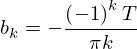

In [19]:
bk = 2/T*integrate(t*sin(k*2*pi*t/T),(t,-T/2,T/2))
Eq(S('b_k'), bk)

## Plots

Let's first have a look at first five components of the Fourier series, i.e. at the first five scaled basis functions $\phi_0, \phi_1, \phi_2, \phi_3$, and $\phi_4$.

Looking back at the lecture notes we find
\begin{align*}
    \alpha_0 &= \sqrt{T} a_0 = 0 \\ 
    \alpha_1 &= \sqrt{\frac{T}{2}} a_1 = 0 \\ 
    \alpha_2 &= \sqrt{\frac{T}{2}} b_1 = \sqrt{\frac{T}{2}}\frac{T}{\pi} \\ 
    \alpha_3 &= \sqrt{\frac{T}{2}} a_2 = 0 \\ 
    \alpha_4 &= \sqrt{\frac{T}{2}} b_2 = -\sqrt{\frac{T}{2}}\frac{T}{2\pi}   
\end{align*}

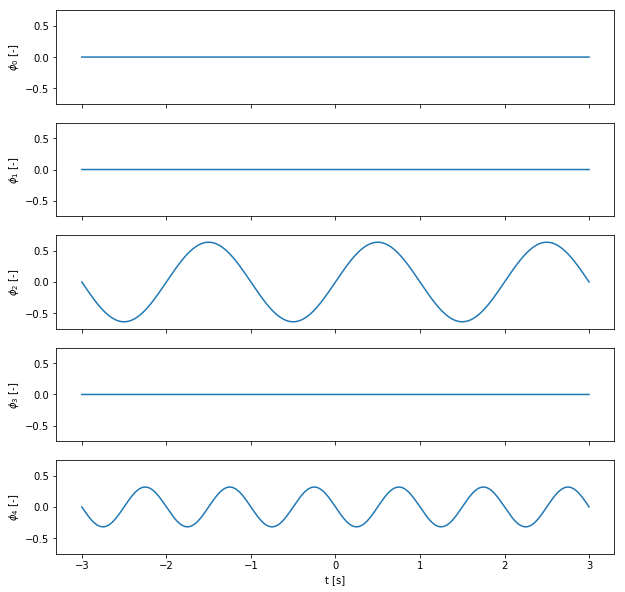

In [20]:
#
num_k = 5  # Number of components to display
num_s = 2000  # Number of points to sample in one period
num_T = 3  # Number of periods to display
T = 2.0  # Period length
t0 = -num_T*T/2  # First time sample. The last one will be at t0 + num_T*T
t1 = t0 + num_T*T  # last time sample
#
w0 = 2*np.pi/T  # Fundamental frequency
num_p = num_T * num_s  # Total number of points to sample
#
t = np.linspace(t0,t1,num_p)  # Uniform sampling of [t0, t1] using num_T*num_p points
#
fk = np.zeros((num_k, num_p))  # Matrix storing num_k rows of num_p samples, 
                               # i.e. storing the first num_k Fourier series components
# 
fig = plt.figure(figsize=(10, 10))  # Initialise the figure for drawing
ax0 = None  # Default axis that will be shared by all subfigures
#
alpha = np.empty(num_k)
#
for k in range(num_k):
    #
    # These are python shorthends, the meaning is the same as the code below
    # ak[k] = 0.0 if k==1 else ((-1)**(k+1)-1)/(np.pi*(k*k-1)) 
    # bk[k] = 0.5 if k==1 else 0.0
    #
    if k == 0 or k % 2 == 1:
        # Index `k` is odd or zero, k=2m-1, m=(k+1)/2
        # alpha_k is zero
        fk[k,:] = np.zeros((1,num_p))
    else:
        # Index `k` is even, k=2m, m=k/2, m>=1
        m = k/2
        bb = (-1)**(m+1)*T/(m*np.pi)
        alpha_k = np.sqrt(T/2)*bb
        fk[k,:] = alpha_k * np.sqrt(T/2) * np.sin(m*w0*t)
    #
    plot_id = k+1
    axk = plt.subplot(num_k,1,plot_id, sharex=ax0)
    plt.plot(t, fk[k,:])
    plt.ylim(-0.75,0.75)
    plt.ylabel(f'$\phi_{{{k}}}$ [-]')
    if num_k == plot_id:
        plt.setp(axk.get_xticklabels(), visible=True)
    else:
        plt.setp(axk.get_xticklabels(), visible=False)
    if k==0:
        ax0 = axk
plt.xlabel('t [s]')
plt.show()

Let us compare it with the scaled harmonic components for $k=0,1,2,3,4$ from the separated formula, i.e. with the components
\begin{align*}
  f_0(t) &= a_0, \\
  f_1(t) &= a_1 \cos(\omega_0 t) + b_1 \sin(\omega_0 t), \\
  f_2(t) &= a_2 \cos(2\omega_0 t) + b_2 \sin(2\omega_0 t), \\
  f_3(t) &= a_3 \cos(3\omega_0 t) + b_3 \sin(3\omega_0 t), \\
  f_4(t) &= a_4 \cos(4\omega_0 t) + b_4 \sin(4\omega_0 t). \\
\end{align*}

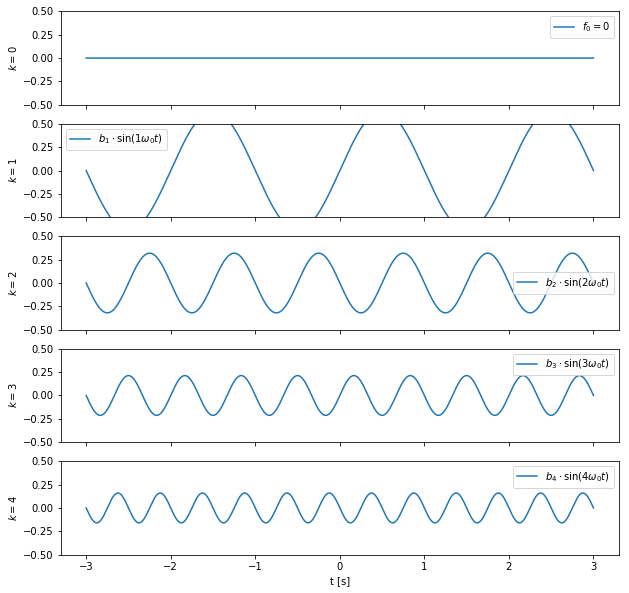

In [21]:
#
num_k = 5  # Number of components to display
num_r = 55  # Number of components to sum up for the final approximation
num_s = 2000  # Number of points to sample in one period
num_T = 3  # Number of periods to display
T = 2.0  # Period length
t0 = -num_T*T/2  # First time sample. The last one will be at t0 + num_T*T
t1 = t0 + num_T*T  # last time sample
#
w0 = 2*np.pi/T  # Fundamental frequency
num_p = num_T * num_s  # Total number of points to sample
#
t = np.linspace(t0,t1,num_p)  # Uniform sampling of [t0, t1] using num_T*num_p points
#
fs = np.zeros(num_p)
fs05 = None
fs15 = None
fs25 = None
#
fig = plt.figure(figsize=(10, 10))
ax0 = None
#
for k in range(num_r):
    if k == 0:
        fsk = np.zeros(num_p)
    else:
        ak = 0.0  # Not needed, just mentioned for clarity
        bk = (-1)**(k+1)*T/(k*np.pi)
        fsk = bk*np.sin(k*w0*t)
    #
    if k == 5:
        fs05 = fs.copy()
    elif k == 15:
        fs15 = fs.copy()
    elif k == 25:
        fs25 = fs.copy()
    # Update the sum to include (k+1) components (remember, in Python
    # we have indexing from 0 and not from 1...)
    fs += fsk
    #
    if k < num_k:
        plot_id = k+1
        axk = plt.subplot(num_k,1,plot_id, sharex=ax0)
        plt.plot(t, fsk)
        plt.ylim(-0.5,0.5)
        plt.ylabel(f'$k = {k}$')
        if num_k == plot_id:
            plt.setp(axk.get_xticklabels(), visible=True)
        else:
            plt.setp(axk.get_xticklabels(), visible=False)
        if k==0:
            ax0 = axk
            plt.legend(['$f_0 = 0$'])
        else:
            plt.legend([f'$b_{{{k}}}\cdot\sin({k}\omega_0 t)$'])
plt.xlabel('t [s]')
plt.show()

In [22]:
# Default figure size for all figures that follow this point
plt.rcParams['figure.figsize'] = [10, 5]

Create a vector holding function values of the original $f(t)$:

In [23]:
# The basic trick is using the floating point modulo operation `% T`.
# We have to shift the signal by half of the period since using only `% T` would generate
# sawtooth that is positive and goes from 0 to T -- we need an odd function that oscillates
# between -T/2 and +T/2
f = ((t+T/2) % T) - T/2

Now we have everything that is needed to plot some graphs that compare the original function with its approximation by partial sums of Fourier series.

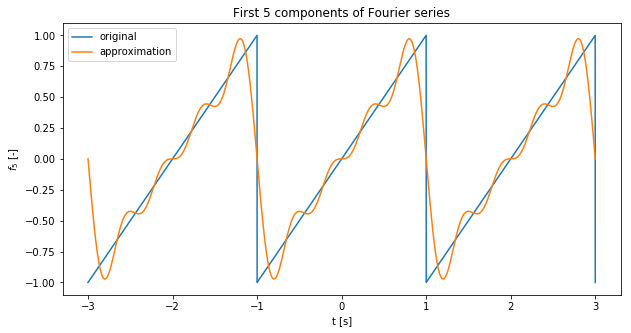

In [24]:
# plt.figure() will be called automatically
plt.plot(t,f,t,fs05)
plt.title('First 5 components of Fourier series')
plt.legend(['original','approximation'])
plt.xlabel('t [s]')
plt.ylabel('$f_{5}$ [-]')
plt.show()

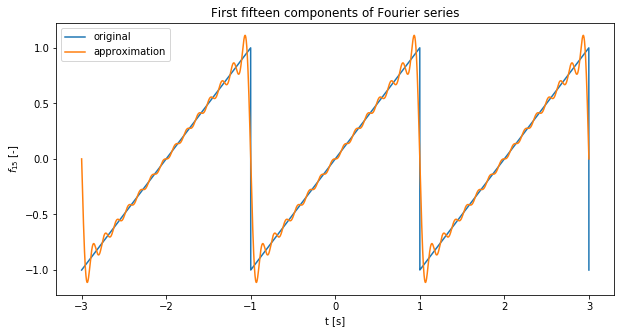

In [25]:
plt.plot(t,f,t,fs15)
plt.title('First fifteen components of Fourier series')
plt.legend(['original','approximation'])
plt.xlabel('t [s]')
plt.ylabel('$f_{15}$ [-]')
plt.show()

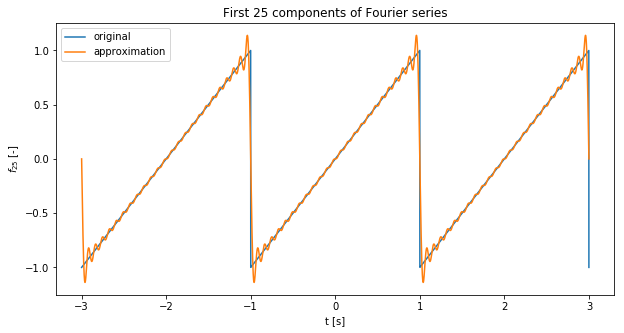

In [26]:
plt.plot(t,f,t,fs25)
plt.title('First 25 components of Fourier series')
plt.legend(['original','approximation'])
plt.xlabel('t [s]')
plt.ylabel('$f_{25}$ [-]')
plt.show()

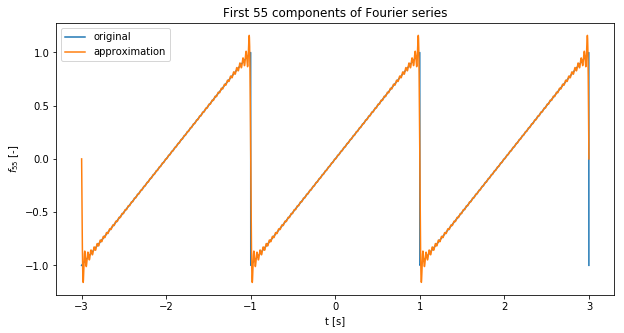

In [27]:
plt.plot(t,f,t,fs)
plt.title(f'First {num_r} components of Fourier series')
plt.legend(['original','approximation'])
plt.xlabel('t [s]')
plt.ylabel(f'$f_{{{num_r}}}$ [-]')
plt.show()

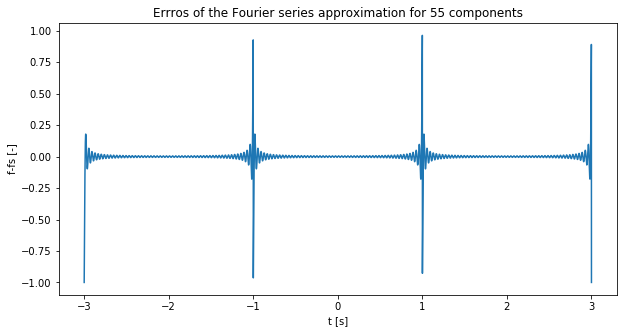

In [28]:
plt.plot(t,f-fs)
plt.title(f'Errros of the Fourier series approximation for {num_r} components')
plt.xlabel('t [s]')
plt.ylabel('f-fs [-]')
plt.show()